In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("monthly_milk_production.csv", index_col ="Date", parse_dates = True)
df.index.freq = "MS"
#index_col is used to initialize the Date as index

In [25]:
df

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


<AxesSubplot:xlabel='Date'>

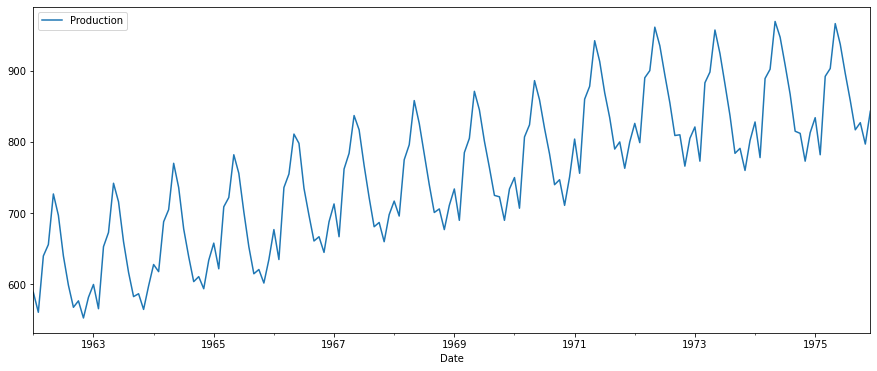

In [21]:
df.plot(figsize=(15, 6))

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


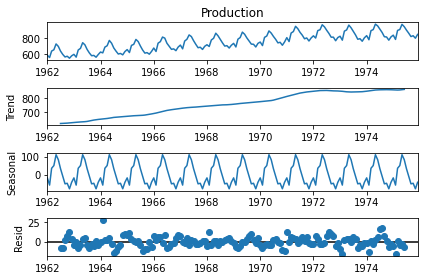

In [30]:
results = seasonal_decompose(df["Production"])
results.plot();
#the trend shows the abstract of a seasonal pattern
#the seasonal pattern shows the graph without the trend
#semi-colon shows only one view of the result
#resid is the unwanted stuff

In [31]:
#converting your dat to stationary data makes it easier for prediction

In [32]:
len(df)

168

In [35]:
train = df.iloc[:156]
test = df.iloc[156:]
#the reason for this is to separate the last 12 months from the train dataset

In [40]:
df.head(), df.tail()

(            Production
 Date                  
 1962-01-01         589
 1962-02-01         561
 1962-03-01         640
 1962-04-01         656
 1962-05-01         727,
             Production
 Date                  
 1975-08-01         858
 1975-09-01         817
 1975-10-01         827
 1975-11-01         797
 1975-12-01         843)

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#MinMaxScaler convers a dataset from 0-1

In [52]:
scaler.fit(train)
scaled_test = scaler.transform(test)
scaled_train = scaler.transform(train)

In [55]:
scaled_train

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154],
       [0.11298077],
       [0.03125   ],
       [0.24038462],
       [0.28846154],
       [0.45432692],
       [0.39182692],
       [0.25721154],
       [0.15384615],
       [0.07211538],
       [0.08173077],
       [0.02884615],
       [0.10817308],
       [0.18028846],
       [0.15625   ],
       [0.32451923],
       [0.36538462],
       [0.52163462],
       [0.43990385],
       [0.30048077],
       [0.20673077],
       [0.12259615],
       [0.13942308],
       [0.09855769],
       [0.19471154],
       [0.25240385],
       [0.16586538],
       [0.375     ],
       [0.40625   ],
       [0.55048077],
       [0.48798077],
       [0.35817308],
       [0.24038462],
       [0.14903846],
       [0.16346154],
       [0.11778846],
       [0.197

In [77]:
from keras.preprocessing.sequence import TimeseriesGenerator

## mini demo of what a generator can do

In [81]:
#what does n_features do
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_input, batch_size =1)

In [82]:
#Use of the generator
#if numpy arays cannot be used you flatten it out
x, y = generator[0]
print(f"Given the array: \n{x.flatten()}")
print(f"predicts this y: \n {y.flatten()}")

Given the array: 
[0.08653846 0.01923077 0.20913462]
predicts this y: 
 [0.24759615]


In [83]:
x.shape

(1, 3, 1)

In [84]:
y.shape

(1, 1)

## continue

In [85]:
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_input, batch_size = 1)

In [98]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import load_model

In [95]:
#defining the model
model = Sequential()
model.add(LSTM(100, activation = "relu", input_shape =(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer = "adam", loss= "mse")

In [96]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.fit(generator, epochs = 50)

Epoch 1/50
144/144 [==============================] - 1s 10ms/step - loss: 0.0074
Epoch 2/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0068
Epoch 3/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0045
Epoch 4/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0041
Epoch 5/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0047
Epoch 6/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0041
Epoch 7/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0050
Epoch 8/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0049
Epoch 9/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0038
Epoch 10/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0041
Epoch 11/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0046
Epoch 12/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0040
Epoch 13/50
144/144 [===

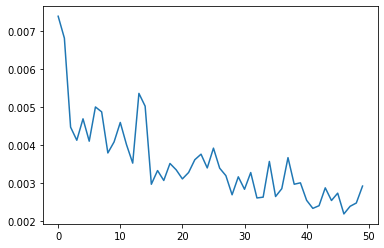

In [100]:
loss_per_epoch = model.history.history["loss"]
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [101]:
last_train_batch = scaled_train[-12:]

In [102]:
last_train_batch.shape

(12, 1)

In [104]:
last_train_batch = last_train_batch.reshape(1, n_input, n_features)

In [105]:
last_train_batch.shape

(1, 12, 1)

In [106]:
model.predict(last_train_batch)

array([[0.6092104]], dtype=float32)

In [110]:
scaled_test

array([[0.67548077],
       [0.55048077],
       [0.81490385],
       [0.84134615],
       [0.99278846],
       [0.92307692],
       [0.82451923],
       [0.73317308],
       [0.63461538],
       [0.65865385],
       [0.58653846],
       [0.69711538]])

## Observation
##### as we can observe, we tried to predict the the very first value of the test dataset from the scaled_trained. and we were damn close

In [120]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape(1, n_input, n_features)
#we simply took the last 12 inputs of the training dataset and reshaped it

for i in range(len(test)):
    
    #getting the prediction vaue for the first batch
    current_pred = model.predict(current_batch)[0]
    #the code above made a prediction on the reshaped training dataset
    test_predictions.append(current_pred)
    #the code above appended the predicted values to the above list,
    #in theory the appended values is supposed to look like the test dataset
    # now what this whole drama means is that we used the last 12 values to make a single prediction in 12 places
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)
    #the above code modifies the training dataset by adding a reset, 
    #A beautiful code ngl
    

In [125]:
test_predictions

[array([0.6092104], dtype=float32),
 array([0.60601085], dtype=float32),
 array([0.7461654], dtype=float32),
 array([0.8143333], dtype=float32),
 array([0.9061664], dtype=float32),
 array([0.89556986], dtype=float32),
 array([0.83653426], dtype=float32),
 array([0.74650747], dtype=float32),
 array([0.65005267], dtype=float32),
 array([0.6064855], dtype=float32),
 array([0.56167763], dtype=float32),
 array([0.58565146], dtype=float32)]

In [128]:
test.head()

,Production,Predictions
Date,,
1975-01-01,834,806.431515
1975-02-01,782,805.100515
1975-03-01,892,863.404804
1975-04-01,903,891.762661
1975-05-01,966,929.965212


In [123]:
#we need to tranform our data
true_prediction = scaler.inverse_transform(test_predictions)

In [124]:
true_prediction

array([[806.43151474],
       [805.10051537],
       [863.40480423],
       [891.76266098],
       [929.96521187],
       [925.55706215],
       [900.99825287],
       [863.54710579],
       [823.42190933],
       [805.29796219],
       [786.65789604],
       [796.63100624]])

In [139]:
test["Predictions"] = true_prediction

C:\Users\hp\AppData\Local\Temp/ipykernel_12888/2758157466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Predictions"] = true_prediction


In [145]:
Production = np.array(test["Production"])

In [149]:
Production.flatten()

array([834, 782, 892, 903, 966, 937, 896, 858, 817, 827, 797, 843],
      dtype=int64)

In [150]:
true_prediction

array([[806.43151474],
       [805.10051537],
       [863.40480423],
       [891.76266098],
       [929.96521187],
       [925.55706215],
       [900.99825287],
       [863.54710579],
       [823.42190933],
       [805.29796219],
       [786.65789604],
       [796.63100624]])

<AxesSubplot:xlabel='Date'>

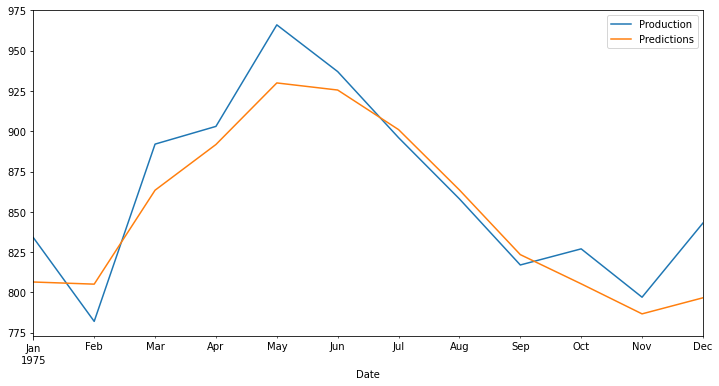

In [132]:
test.plot(figsize=(12, 6))

In [147]:
#I made a mistake here
print("Test set score: {:.2f}".format(np.mean(true_prediction == Production)))

Test set score: 0.00


In [151]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rsme = sqrt(mean_squared_error(test["Production"], test["Predictions"]))
print(rsme)

23.259549932873348


# How to minimize error


In [163]:
y_pred = list(true_prediction.flatten())

In [164]:
y_test =list(Production)

In [166]:
y_pred

[806.4315147399902,
 805.1005153656006,
 863.4048042297364,
 891.7626609802247,
 929.9652118682862,
 925.557062149048,
 900.9982528686525,
 863.5471057891847,
 823.4219093322754,
 805.2979621887207,
 786.6578960418701,
 796.6310062408447]

In [167]:
y_test

[834, 782, 892, 903, 966, 937, 896, 858, 817, 827, 797, 843]

In [173]:
for value in y_pred:
    i

0.0